<a href="https://colab.research.google.com/github/Yuri-Vlasqz/Imersao_de_dados_Alura_2022/blob/main/Imers%C3%A3o_de_dados_Alura_(2022)_aulas_%2B_desafios_3_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **4º Imersão de dados Alura (2022)**
**Aulas 3 e 4**

Instrutores:
---
- Thiago Gonçalves - Machine Learning Engineering Manager na Creditas
- Vivian Yamassaki - Lead Data Scientist I na Creditas
- Paulo Silveira - Co-fundador e CEO da Alura
___
Autor: Yuri Velasquez
---
[Github](https://github.com/Yuri-Vlasqz)

___
Datasets utilizados
---
- Imóveis SP: 
    - [Original Kaggle](https://www.kaggle.com/datasets/kaggleshashankk/house-price-data-of-sao-paulo)
    - [Utilizado nas aulas](https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv)
- [IBGE SP - 2010](https://ftp.ibge.gov.br/Censos/Censo_Demografico_2010/Resultados_do_Universo/Agregados_por_Setores_Censitarios/)

Dicionário de dados do IBGE:

Nome da coluna | Descrição
---------------|------------------
V001:          | Domicílios particulares permanentes ou pessoas responsáveis por domicílios particulares permanentes
V002:          | Moradores em domicílios particulares permanentes ou população residente em domicílios particulares permanentes
V003:          | Média do número de moradores em domicílios particulares permanentes (obtida pela divisão de Var2 por Var1) 
V004:          | Variância do número de moradores em domicílios particulares permanentes
V005:          | Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
V006:          | Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com e sem rendimento)
V007:          | Valor do rendimento nominal médio mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
V008:          | Variância do rendimento nominal mensal das pessoas responsáveis por domicílios particulares permanentes (com rendimento)
V009:          | Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
V010:          | Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com e sem rendimento)
V011:          | Valor do rendimento nominal médio mensal das pessoas de 10 anos ou mais de idade (com rendimento)
V012:          | Variância do rendimento nominal mensal das pessoas de 10 anos ou mais de idade (com rendimento)


- [Endereços](https://drive.google.com/file/d/1NsOu_xPgl4eda3dlpBJXLUIuQg6vKxDM/view?usp=sharing)
- [Setores Censitários](https://drive.google.com/drive/folders/1jSGnrWAr-47s3ktM95Fr-ethJgMWisLL?usp=sharing)


In [ ]:
# Instalação de bibliotecas
!pip install geopandas

# Importação de blibliotecas
from shapely.geometry import Point
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np
import time

# Parâmetros Globais
pd.set_option('display.float_format', lambda x: '%.2f' %x)
pd.set_option("max_columns", None)
sns.set()

# Link Datasets
imoveis_sp_url = "https://raw.githubusercontent.com/Yuri-Vlasqz/Imersao_de_dados_Alura_2022/main/dados_imoveis.csv"
ibge_sp_url = "https://raw.githubusercontent.com/Yuri-Vlasqz/Imersao_de_dados_Alura_2022/main/Basico_SP1.csv"
enderecos_br_url = "/content/drive/MyDrive/Imersão_de_dados_Alura_(2022)/enderecos.csv"
set_cens_sp_url = "/content/drive/MyDrive/Imersão_de_dados_Alura_(2022)/sp_setores_censitarios/35SEE250GC_SIR.shp"

## Funções 

In [ ]:
def baixa_datasets(imoveis, ibge, enderecos, set_cens):
    """
    Baixa os datasets em csv e shp de uma url e cria dataframes.
    !!! Necessita da instalação da biblioteca de geopandas para ler set_cens !!!


    Parametros
    ----------
    imoveis: string
        Link do arquivo.csv de imoveis no estado de SP.
        
    ibge: string
        Link do arquivo.csv do dados do IBGE 2010 da regiao metropolitana de São Paulo.

    enderecos: string
        Link do arquivo.csv da base de dados de endereços do Brasil.

    set_cens: string
        Link do arquivo.shp dos setores censitários do estado de SP.
        OBS: Precisa estar com os outros 3 arquivos (do tipo .dbf, .prj e .shx) na mesma pasta do aquivo.shp
    
        
    Retorna
    -------
    imoveis_df: Dataframe
        Tabela de imoveis de SP.
        
    ibge_df: Dataframe
        Tabela do dados do IBGE (Censo 2010) do municipio de SP.

    enderecos_df: Dataframe
        Tabela da base de dados de endereços do Brasil.

    set_cens_gdf: GeoDataframe
        Tabela de referência espacial (coordenadas geográficas) dos setores censitários de SP.


    Exemplos
    --------
    imoveis_df, ibge_df, enderecos_df, set_cens_gdf = baixa_dataset(imoveis_url, ibge_url, enderecos_url, set_cens_url)
    """

    # Tempo de leitura - Começo
    start = time.time()


    # Criando Dataframes
    
    # -- Imoveis --
    imoveis_df = pd.read_csv(imoveis)

    # -- IBGE 2010 --
    ibge_df = pd.read_csv(ibge, encoding='utf-8', sep=';', thousands='.', decimal=',')
    ibge_df.dropna(how='all', axis=1, inplace=True)

    # -- Endereços --
    enderecos_df = pd.read_csv(enderecos)
    
    # -- Setor Censitário --
    set_cens_gdf = gpd.read_file(set_cens)


    # Tempo de Leitura - Final
    end = time.time()
    print(f"Tempo para baixar dados: {round((end - start), 2)} segundos\n")

    # Informações Datasets
    linhas, colunas = imoveis_df.shape
    print(f'Dataset Imoveis: {linhas} Linhas X {colunas} Colunas')

    linhas, colunas = ibge_df.shape
    print(f'Dataset IBGE: {linhas} Linhas X {colunas} Colunas')

    linhas, colunas = enderecos_df.shape
    print(f'Dataset Endereços: {linhas} Linhas X {colunas} Colunas')

    linhas, colunas = set_cens_gdf.shape
    print(f'Dataset Setor Censitário: {linhas} Linhas X {colunas} Colunas')

    return imoveis_df, ibge_df, enderecos_df, set_cens_gdf

In [ ]:
def col_para_float(dados, col):
    """
    Transforma uma coluna de um dataframe do tipo string em float.

    Parametros
    ----------
    dados: dataframe
        Tabela de dados.
    col: string
        Coluna tipo 'str' do dataset.
        
    Retorna
    -------
    dados_col_float: dataframe
        Tabelas com tipo da coluna transformada.

    Exemplos
    --------
    dados_col_float = col_para_float(dados, 'coluna')
    """

    # Transformando coluna "Valor" de string para float
    dados["Tipo_anuncio"] = dados[col].str.split(expand = True)[2]
    dados[col] = dados[col].str.split(expand = True)[1]
    dados[col] = dados[col].str.replace(".","",regex=True).astype(float)

    display(dados.head(5))

    return dados

In [ ]:
def remove_aluguel(dados):
    """
    Remove as linhas com anuncio de tipo aluguel por ano, mes ou dia

    Parameters
    ----------
    dados: dataframe
        Tabela de dados
        
    Returns
    -------
    sem_aluguel: dataframe
        Tabela sem linhas de alugueis
        
    Examples
    --------
    sem_aluguel = remove_aluguel(dados)
    """    

    # Removendo as linhas do tipo aluguel (/dia, /mes, /ano)
    dados = dados[dados['Tipo_anuncio'].isnull()]
    dados = dados.drop(columns=['Tipo_anuncio'])

    linhas, colunas = dados.shape
    print(f'Dataset sem aluguéis: {linhas} Linhas X {colunas} Colunas')
    display(dados.head())

    return dados

In [ ]:
def corr_matrix(data, cmap='divergent'):
    """
    It reads a dataframe and show a Lower Triangle Correlation Matrix.

    Parameters
    ----------
    data: dataframe
        Tabela ou colunas da tabela a serem correlacionadas (tipo numerico)
    cmap: string 
        Representa o mapa de cores (default='divergent' or 'sequencial')
        
    Returns
    -------
    matriz: None
        Mostra a matriz de correlação na chamada da função
        
    Examples
    --------
    corr_matrix(data[lista_colunas], 'cmap')
    """    

    # Lower Triangle Correlation Matrix
    corr_df = data.corr()
    corr_shape = corr_df.shape
    tri_df = corr_df.where(np.tril(np.ones(corr_shape)).astype(bool))

    # Figure Ploting parameters
    if cmap == "sequential":
        cmap = "rocket"
    else:
        cmap = "coolwarm"

    plt.figure(figsize=(corr_shape))
    sns.heatmap(tri_df, linewidths=0.5, annot=True, cmap=cmap)
    plt.title('Correlation Matrix')
    plt.xticks(rotation=40, ha='right')

    return

In [ ]:
def missing_values(dataset):
    """
    It reads a dataframe and check Missing Values.

    Parameters
    ------
    dataset: dataframe
        Table with dataset to be checked.
        
    Returns
    ------
    MissingSummary: dataframe
        Table with missing values statistics.

    Examples
    ------
    nulls_data = missing_values(dataset)
    """

    categories = []
    null_list = []
    null_percent = []

    for column in dataset:
        categories.append(column)
        null_list.append(dataset[column].isnull().sum())
        null_percent.append(round( (null_list[-1] / dataset.shape[0]) *100, 3))

    nulls_data = pd.DataFrame({'Field Name': categories, 
                                'Total Missing Values': null_list, 
                                'Missing Percentage': null_percent})
    print('Dataset shape:')
    print(f'{dataset.shape[0]} rows X {dataset.shape[1]} columns')

    return nulls_data

## Inicialização

In [ ]:
# Baixando e criando tabelas de dados
imoveis_df, ibge_df, enderecos_df, set_cens_gdf = baixa_datasets(imoveis_sp_url, ibge_sp_url, enderecos_br_url, set_cens_sp_url)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  


Tempo para baixar dados: 13.69 segundos

Dataset Imoveis: 10008 Linhas X 8 Colunas
Dataset IBGE: 18363 Linhas X 33 Colunas
Dataset Endereços: 1113886 Linhas X 10 Colunas
Dataset Setor Censitário: 68296 Linhas X 15 Colunas


In [ ]:
# Tabelas geradas
print('\nDataset Imoveis')
display(imoveis_df.head())
print('\n\nDataset IBGE')
display(ibge_df.head())
print('\n\nDataset Enderecos')
display(enderecos_df.head())
print('\n\nDataset Setor Censitario')
display(set_cens_gdf.head())


Dataset Imoveis


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000




Dataset IBGE


,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,355030801000001,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,RM São Paulo,3550308,SÃO PAULO,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,3550308000,SÃO PAULO (todos os setores),1,0,266.00,800.00,3.01,2.32,2091.32,8532451.78,2164.55,8673276.78,1227.41,4285771.99,1713.75,5152087.86
1,355030801000002,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,RM São Paulo,3550308,SÃO PAULO,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,3550308000,SÃO PAULO (todos os setores),1,0,306.00,913.00,2.98,2.09,1650.09,3983441.31,1717.44,4030519.99,1045.78,2572133.32,1468.08,2991546.94
2,355030801000003,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,RM São Paulo,3550308,SÃO PAULO,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,3550308000,SÃO PAULO (todos os setores),1,0,189.00,625.00,3.31,3.08,1280.43,5474593.06,2349.53,7553913.02,902.97,2735492.52,1786.79,3837674.74
3,355030801000004,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,RM São Paulo,3550308,SÃO PAULO,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,3550308000,SÃO PAULO (todos os setores),1,0,181.00,572.00,3.16,2.26,1119.59,3572955.10,1859.13,4567289.50,869.09,2122409.02,1567.41,2735383.24
4,355030801000005,3,Região Sudeste,35,São Paulo,3515,Metropolitana de São Paulo,35061,São Paulo,20,RM São Paulo,3550308,SÃO PAULO,355030801,ÁGUA RASA,35503080100,ÁGUA RASA,3550308000,SÃO PAULO (todos os setores),1,0,240.00,754.00,3.14,2.35,1416.90,2240207.58,1581.66,2240109.39,917.71,1570047.75,1356.35,1725877.85




Dataset Enderecos


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55




Dataset Setor Censitario


,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [ ]:
# Tranformando coluna valor em float e gerando coluna de tipo de anuncio
imoveis_val_float_df = col_para_float(imoveis_df, 'Valor')

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,None


In [ ]:
# Removendo linhas com anuncio de tipo aluguel \dia, \mes e \ano
imoveis_vendas_df = remove_aluguel(imoveis_val_float_df)

Dataset sem aluguéis: 9156 Linhas X 8 Colunas


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00


In [ ]:
# Criando coluna de preço por metro quadrado
imoveis_vendas_df.insert(loc=8, column='Preco_m2', value=(imoveis_vendas_df.Valor / imoveis_vendas_df.Metragem))
imoveis_vendas_df.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00


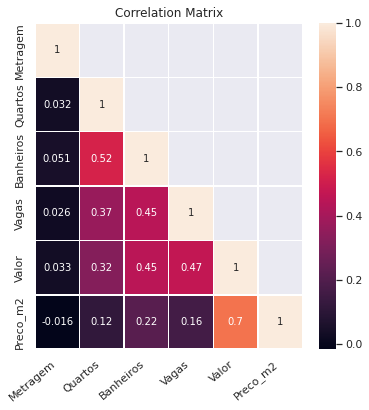

In [ ]:
corr_matrix(imoveis_vendas_df, 'sequential')

## **Desafios Aula 3**

- Tentar vincular dados do IBGE com os dados de imóveis.
- Tratar os outliers e comparar com os resultados.
- Agrupar por mais de uma categoria e realizar as análises.
- Organize o colab para deixar com cara de projeto.

### Vinculando dados do IBGE com os dados de imóveis.

In [ ]:
# Dados do IBGE serão vinculados através do codigo do Setor Censitario (Coluna: Cod_setor)
display(ibge_df.iloc[0:5, [0,2,4,6,8,10,12,14,16,18]])
ibge_df.shape

,Cod_setor,Nome_Grande_Regiao,Nome_da_UF,Nome_da_meso,Nome_da_micro,Nome_da_RM,Nome_do_municipio,Nome_do_distrito,Nome_do_subdistrito,Nome_do_bairro
0,355030801000001,Região Sudeste,São Paulo,Metropolitana de São Paulo,São Paulo,RM São Paulo,SÃO PAULO,ÁGUA RASA,ÁGUA RASA,SÃO PAULO (todos os setores)
1,355030801000002,Região Sudeste,São Paulo,Metropolitana de São Paulo,São Paulo,RM São Paulo,SÃO PAULO,ÁGUA RASA,ÁGUA RASA,SÃO PAULO (todos os setores)
2,355030801000003,Região Sudeste,São Paulo,Metropolitana de São Paulo,São Paulo,RM São Paulo,SÃO PAULO,ÁGUA RASA,ÁGUA RASA,SÃO PAULO (todos os setores)
3,355030801000004,Região Sudeste,São Paulo,Metropolitana de São Paulo,São Paulo,RM São Paulo,SÃO PAULO,ÁGUA RASA,ÁGUA RASA,SÃO PAULO (todos os setores)
4,355030801000005,Região Sudeste,São Paulo,Metropolitana de São Paulo,São Paulo,RM São Paulo,SÃO PAULO,ÁGUA RASA,ÁGUA RASA,SÃO PAULO (todos os setores)


(18363, 33)

In [ ]:
# Dados do IBGE contemplam somente a regiao metropolitana de São Paulo.
ibge_df['Nome_do_municipio'].value_counts()

SÃO PAULO    18363
Name: Nome_do_municipio, dtype: int64

In [ ]:
# Para isso, sera necessario descobrir qual a area geografica coberta por cada setor censitário em SP.
display(set_cens_gdf.head(), set_cens_gdf.shape, set_cens_gdf.crs)

# Filtrando para municipio de São Paulo
set_cens_sp_gdf = set_cens_gdf[set_cens_gdf.NM_MUNICIP == "SÃO PAULO"]
display(set_cens_sp_gdf.head(), set_cens_sp_gdf.shape)

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


(68296, 15)

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - Central America and South America - onshore and offshore. Brazil - onshore and offshore.
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
42322,109347.00,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42323,"POLYGON ((-46.51778 -23.57947, -46.51786 -23.5..."
42323,109348.00,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42324,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5..."
42324,109349.00,355030804000081,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42325,"POLYGON ((-46.52015 -23.58105, -46.52026 -23.5..."
42325,109350.00,355030804000082,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42326,"POLYGON ((-46.52140 -23.57992, -46.52144 -23.5..."
42326,109351.00,355030804000083,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42327,"POLYGON ((-46.52371 -23.58185, -46.52384 -23.5..."


(18953, 15)

Text(0.5, 102.5, 'Longitude')

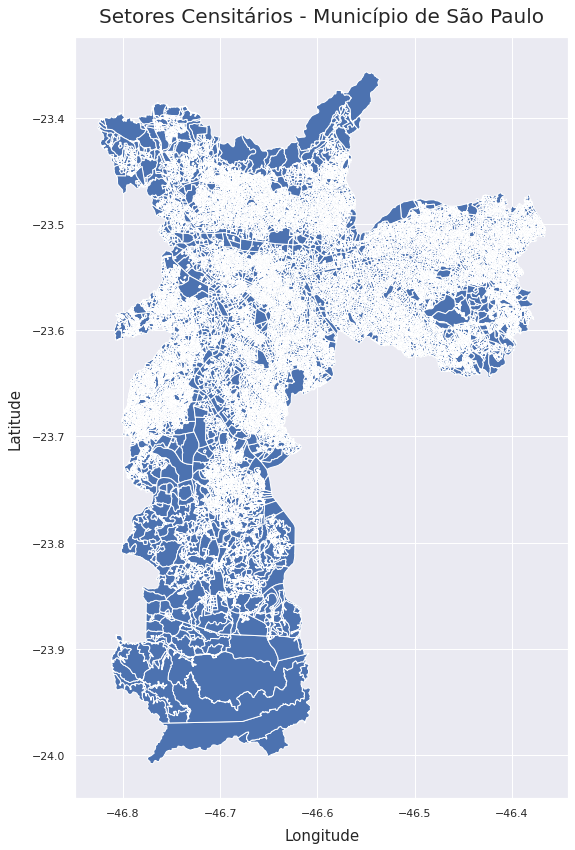

In [ ]:
# Atraves dos valores de referencia espacial, do GeoDataframe acima, sera possível definir os limites de cada setor:
ax = set_cens_sp_gdf.plot(figsize=(14,14))
ax.set_title('Setores Censitários - Município de São Paulo', fontsize=20, pad=15);
ax.set_ylabel('Latitude', fontsize=15, labelpad=10)
ax.set_xlabel('Longitude', fontsize=15, labelpad=10)

In [ ]:
# Dessa forma, é preciso descobrir em qual setor censitário cada imóvel esta contido.
# Isto será obtido ao relacionar os dados de long. e lat., da base de dados de endereços, aos dados de venda de imoveis.
enderecos_sp_df = enderecos_df.query("sigla_uf == 'SP'")
display(enderecos_sp_df.head(), enderecos_sp_df.shape)

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35


(298124, 10)

In [ ]:
# Manipulando os dados (enderecos e vendas de imoveis) para obter uma coluna de correspondencia em ambos:
# Rua e bairro (visto que ha ruas com nomes repetidos)
# unicode? (acentos faltantes?)

# Enderecos
enderecos_sp_df["rua_e_bairro"] = enderecos_sp_df["tipo_logr"] + " " + enderecos_sp_df["logr_nome"] + " - " + enderecos_sp_df['bairro']
enderecos_sp_df["rua_e_bairro"] = enderecos_sp_df["rua_e_bairro"].str.lower().str.strip()
display(enderecos_sp_df.head())
display(missing_values(enderecos_sp_df))
print("\n\n")

# Vendas imoveis
imoveis_vendas_df["rua_com_bairro"] = imoveis_vendas_df["Rua"].str.extract(r'(^[\w ]+)') + " - " + imoveis_vendas_df["Bairro"].str.extract(r'(^[\w ]+)')
imoveis_vendas_df["rua_com_bairro"] = imoveis_vendas_df["rua_com_bairro"].str.lower().str.strip()
display(imoveis_vendas_df.head())
display(missing_values(imoveis_vendas_df))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua_e_bairro
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos - amizade
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a - jardim glória
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a - jardim são roque
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a - iate clube de campinas
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini - jardim miriam


Dataset shape:
298124 rows X 11 columns


,Field Name,Total Missing Values,Missing Percentage
0,tipo_logr,18,0.01
1,logr_nome,19,0.01
2,logr_compl,18,0.01
3,numero,292711,98.18
4,bairro,20,0.01
5,nome_localidade,0,0.00
6,sigla_uf,0,0.00
7,cep,0,0.00
8,latitude,367,0.12
9,longitude,367,0.12


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_com_bairro
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,685000.00,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca


Dataset shape:
9156 rows X 10 columns


,Field Name,Total Missing Values,Missing Percentage
0,Rua,3049,33.30
1,Bairro,10,0.11
2,Cidade,0,0.00
3,Metragem,0,0.00
4,Quartos,0,0.00
5,Banheiros,0,0.00
6,Vagas,0,0.00
7,Valor,0,0.00
8,Preco_m2,0,0.00
9,rua_com_bairro,3059,33.41


In [ ]:
# Removendo todas as linhas com valores nulos nas colunas de correspondencias:

# Enderecos - rua_e_bairro
enderecos_sp_df = enderecos_sp_df.dropna(subset=['rua_e_bairro'])
display(missing_values(enderecos_sp_df))
print('\n\n')

# Vendas imoveis - rua_com_bairro
imoveis_vendas_df = imoveis_vendas_df.dropna(subset=['rua_com_bairro'])
display(missing_values(imoveis_vendas_df))

Dataset shape:
298103 rows X 11 columns


,Field Name,Total Missing Values,Missing Percentage
0,tipo_logr,0,0.00
1,logr_nome,0,0.00
2,logr_compl,0,0.00
3,numero,292690,98.18
4,bairro,0,0.00
5,nome_localidade,0,0.00
6,sigla_uf,0,0.00
7,cep,0,0.00
8,latitude,367,0.12
9,longitude,367,0.12





Dataset shape:
6097 rows X 10 columns


,Field Name,Total Missing Values,Missing Percentage
0,Rua,0,0.00
1,Bairro,0,0.00
2,Cidade,0,0.00
3,Metragem,0,0.00
4,Quartos,0,0.00
5,Banheiros,0,0.00
6,Vagas,0,0.00
7,Valor,0,0.00
8,Preco_m2,0,0.00
9,rua_com_bairro,0,0.00


In [ ]:
# Mesclando os dados de cep, lat. e long. aos dados de venda de imoveis 
# pela correspondência nos valores das colunas 'rua' e 'apenas_rua':
imoveis_geo = pd.merge(left = imoveis_vendas_df, right = enderecos_sp_df[["rua_e_bairro", "cep", "latitude", "longitude"]], 
                     how = "left", left_on = "rua_com_bairro", right_on = "rua_e_bairro"
                     ).drop_duplicates(subset=imoveis_vendas_df.columns).query("cep > 0")
# Eliminando colunas redundantes residuais                    
imoveis_geo.drop(columns='rua_com_bairro', inplace=True)

display(imoveis_geo.head(), missing_values(imoveis_geo))

Dataset shape:
5274 rows X 13 columns


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista,4061000.00,-23.62,-46.65
4,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados,4642020.00,-23.64,-46.69
5,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg,4845200.00,-23.75,-46.70
6,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca,3176000.00,-23.55,-46.59
7,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,rua graham bell - santo amaro,4737030.00,-23.59,-46.76


,Field Name,Total Missing Values,Missing Percentage
0,Rua,0,0.00
1,Bairro,0,0.00
2,Cidade,0,0.00
3,Metragem,0,0.00
4,Quartos,0,0.00
5,Banheiros,0,0.00
6,Vagas,0,0.00
7,Valor,0,0.00
8,Preco_m2,0,0.00
9,rua_e_bairro,0,0.00


Text(0.5, 263.8827420072825, 'Longitude')

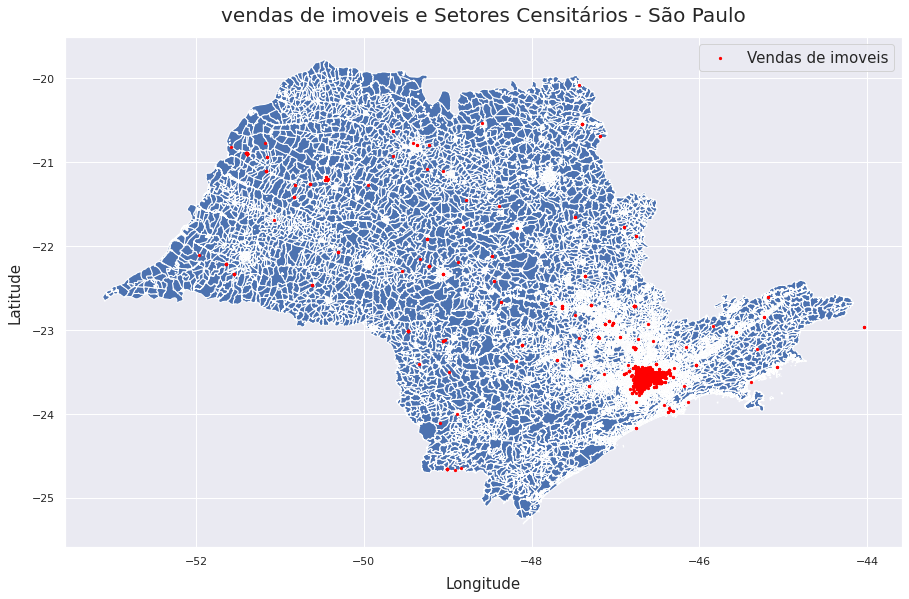

In [ ]:
# Gerando pontos de coordenadas das vendas
#set_cens_sp_gdf['geometry'].head(10).plot()
imoveis_dentro = imoveis_geo[imoveis_geo["latitude"] < -20]
geometry=[Point(xy) for xy in zip(imoveis_dentro["longitude"], imoveis_dentro["latitude"])]
crs={'init':'epsg:4674'} # Sistema de Referência de Coordenadas utilizada no ibge e setor censitario
geodata=gpd.GeoDataFrame(crs=crs, geometry=geometry)

# Gerando grafico de setores censitarios e venda de imoveis em SP
fig, ax = plt.subplots(figsize=(15,15))
set_cens_gdf.plot(ax=ax)
#You can use different 'cmaps' such as jet, plasm, magma, infereno, cividis, binary...
geodata.plot(ax=ax, color='red', markersize=5);
ax.set_title('vendas de imoveis e Setores Censitários - São Paulo', fontsize=20, pad=15);
plt.legend(['Vendas de imoveis'], prop={'size': 15})
ax.set_ylabel('Latitude', fontsize=15, labelpad=10)
ax.set_xlabel('Longitude', fontsize=15, labelpad=10)

In [ ]:
# Retornando o setor censitario (CD_GEOCODI) de uma rua dos dados mesclados de vendas de imoveis (long., lat.)
set_cens_gdf[set_cens_gdf.contains(Point(imoveis_geo.longitude[0], imoveis_geo.latitude[0]))]

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
58887,124412.00,355030877000067,URBANO,35503087700,None,355030877,SAÚDE,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,58888,"POLYGON ((-46.64827 -23.61523, -46.64802 -23.6..."


In [ ]:
# Inserindo o ponto geografico nos dados de vendas de imoveis
imoveis_geo["Point"] = ""
for i in imoveis_geo.index:
    imoveis_geo["Point"][i] = Point(imoveis_geo["longitude"][i], imoveis_geo["latitude"][i])

imoveis_geo.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude,Point
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934)
4,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612)
5,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299)
6,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597)
7,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,rua graham bell - santo amaro,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964)


In [ ]:
# Buscando os codigos de setores censitarios, em que, cada imovel esta contido dentro de SP
# !!! --- Celula leva 20 MINUTOS para completar execução --- !!!
imoveis_geo['setor_censo'] = imoveis_geo["Point"].map(
    lambda x: set_cens_gdf.loc[set_cens_gdf.contains(x), 'CD_GEOCODI'].values).str[0]

display(imoveis_geo.head(), missing_values(imoveis_geo))

Dataset shape:
5274 rows X 15 columns


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067
4,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023
5,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050
6,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050
7,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,rua graham bell - santo amaro,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169


,Field Name,Total Missing Values,Missing Percentage
0,Rua,0,0.00
1,Bairro,0,0.00
2,Cidade,0,0.00
3,Metragem,0,0.00
4,Quartos,0,0.00
5,Banheiros,0,0.00
6,Vagas,0,0.00
7,Valor,0,0.00
8,Preco_m2,0,0.00
9,rua_e_bairro,0,0.00


In [ ]:
# Salvando dados de Imovel com setor censitario
from google.colab import files, drive

In [ ]:
imoveis_geo.to_csv('imoveis_geo_set_5274.csv', encoding = 'utf-8-sig') 
files.download('imoveis_geo_set_5274.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#drive.mount('/content/drive')
path = "/content/drive/MyDrive/Imersão_de_dados_Alura_(2022)/Datasets gerados/imoveis_geo_set_5274.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
    imoveis_geo.to_csv(f)

In [ ]:
# Lendo dados de imoveis com codigo de setor censitario (conforme executado anteriormente)
path = "/content/drive/MyDrive/Imersão_de_dados_Alura_(2022)/Datasets gerados/imoveis_geo_set_5274.csv"
imoveis_drive = pd.read_csv(path)
imoveis_geo_set = imoveis_drive.drop(imoveis_drive.columns[[0]], axis=1)
display(imoveis_geo_set.head(), missing_values(imoveis_geo_set))

Dataset shape:
5274 rows X 15 columns


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,rua graham bell - santo amaro,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00


,Field Name,Total Missing Values,Missing Percentage
0,Rua,0,0.00
1,Bairro,0,0.00
2,Cidade,0,0.00
3,Metragem,0,0.00
4,Quartos,0,0.00
5,Banheiros,0,0.00
6,Vagas,0,0.00
7,Valor,0,0.00
8,Preco_m2,0,0.00
9,rua_e_bairro,0,0.00


In [ ]:
imoveis_geo_set[imoveis_geo_set['setor_censo'].isnull()]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude,Point,setor_censo
691,Rua Aquiramum,Alto de Pinheiros,São Paulo,560,4,4,4,4500000.00,8035.71,rua aquiramum - alto de pinheiros,5446030.00,-14.24,-51.93,POINT (-51.92528 -14.235004),NaN
4954,Rua Mangaratiba,Vila Santo Antônio,São Paulo,140,3,3,3,1000000.00,7142.86,rua mangaratiba - vila santo antônio,4811010.00,-22.96,-44.04,POINT (-44.0413146 -22.9598984),NaN
5036,Rua Mangaratiba,Vila Santo Antônio,São Paulo,145,3,3,3,1000000.00,6896.55,rua mangaratiba - vila santo antônio,4811010.00,-22.96,-44.04,POINT (-44.0413146 -22.9598984),NaN


In [ ]:
# removendo todas as linhas com valores nulos de cod. censitario (Fora de SP)
imoveis_geo_set = imoveis_geo_set.dropna(subset=['setor_censo'])
imoveis_geo_set

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,rua graham bell - santo amaro,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5269,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,1500000.00,5617.98,avenida odila - planalto paulista,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099.00
5270,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,665000.00,7000.00,rua tapuçu - vila sofia,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087.00
5271,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,2300000.00,3801.65,rua guararema - bosque da saúde,4136030.00,-23.41,-46.04,POINT (-46.0373872 -23.411688),351830505000002.00
5272,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,1050000.00,5121.95,rua estero belaco - vila da saúde,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052.00


In [ ]:
imoveis_geo_set['setor_censo'].value_counts()

355030802000017.00    44
355030854000008.00    37
355030832000002.00    35
355030826000019.00    33
355030862000103.00    31
                      ..
355030814000034.00     1
355030865000109.00     1
355030854000011.00     1
355030851000027.00     1
355030823000168.00     1
Name: setor_censo, Length: 1705, dtype: int64

In [ ]:
# Nao há linhas duplicadas
imoveis_geo_set.duplicated(keep=False).unique()

array([False])

In [ ]:
# Inserindo dados do IBGE nos dados de vendas:
imoveis_geo_ibge = pd.merge(left = imoveis_geo_set, right = ibge_df, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
display(imoveis_geo_ibge.shape, imoveis_geo_ibge.head())

# Removendo colunas desnecessarias
colunas = imoveis_geo_ibge.loc[:, 'Cod_setor':'Nome_do_municipio'].columns.to_list()
colunas.extend(imoveis_geo_ibge.loc[:, 'Cod_subdistrito':'Nome_do_bairro'].columns.to_list())
imoveis_geo_ibge.drop(columns=colunas, inplace=True)
print(f'\nColunas removidas:\n{colunas}\n')
display(imoveis_geo_ibge.head(),imoveis_geo_ibge.shape)

(5271, 48)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude,Point,setor_censo,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00,355030877000067.00,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030877.00,SAÚDE,35503087700.00,SAÚDE,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00,355030871000023.00,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030871.00,SANTO AMARO,35503087100.00,SANTO AMARO,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830000050.00,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030830.00,GRAJAÚ,35503083000.00,GRAJAÚ,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808000050.00,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030808.00,BELÉM,35503080800.00,BELÉM,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,rua graham bell - santo amaro,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865000169.00,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030865.00,RAPOSO TAVARES,35503086500.00,RAPOSO TAVARES,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46



Colunas removidas:
['Cod_setor', 'Cod_Grandes Regiões', 'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio', 'Cod_subdistrito', 'Nome_do_subdistrito', 'Cod_bairro', 'Nome_do_bairro']



,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude,Point,setor_censo,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00,355030877.00,SAÚDE,1.00,0.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00,355030871.00,SANTO AMARO,1.00,0.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830.00,GRAJAÚ,1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808.00,BELÉM,1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,rua graham bell - santo amaro,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865.00,RAPOSO TAVARES,1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


(5271, 31)

In [ ]:
# Linhas de codigo de setor censitario, com valor nulo, estao fora do municipio de Sao Paulo
missing_values(imoveis_geo_ibge)

Dataset shape:
5271 rows X 31 columns


,Field Name,Total Missing Values,Missing Percentage
0,Rua,0,0.00
1,Bairro,0,0.00
2,Cidade,0,0.00
3,Metragem,0,0.00
4,Quartos,0,0.00
5,Banheiros,0,0.00
6,Vagas,0,0.00
7,Valor,0,0.00
8,Preco_m2,0,0.00
9,rua_e_bairro,0,0.00


In [ ]:
# Removendo imoveis fora do municipio de Sao Paulo
imoveis_geo_ibge = imoveis_geo_ibge.dropna(subset=['Cod_distrito'])
missing_values(imoveis_geo_ibge)

Dataset shape:
4905 rows X 31 columns


,Field Name,Total Missing Values,Missing Percentage
0,Rua,0,0.00
1,Bairro,0,0.00
2,Cidade,0,0.00
3,Metragem,0,0.00
4,Quartos,0,0.00
5,Banheiros,0,0.00
6,Vagas,0,0.00
7,Valor,0,0.00
8,Preco_m2,0,0.00
9,rua_e_bairro,0,0.00


In [ ]:
# Salvando dados de Imovel com dados do IBGE
from google.colab import files, drive

imoveis_geo_ibge.to_csv('imoveis_geo_ibge_4905.csv', encoding = 'utf-8-sig') 
files.download('imoveis_geo_ibge_4905.csv')

#drive.mount('/content/drive')
path = "/content/drive/MyDrive/Imersão_de_dados_Alura_(2022)/Datasets gerados/imoveis_geo_ibge_4905.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
    imoveis_geo_ibge.to_csv(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Text(0.5, 111.5, 'Longitude')

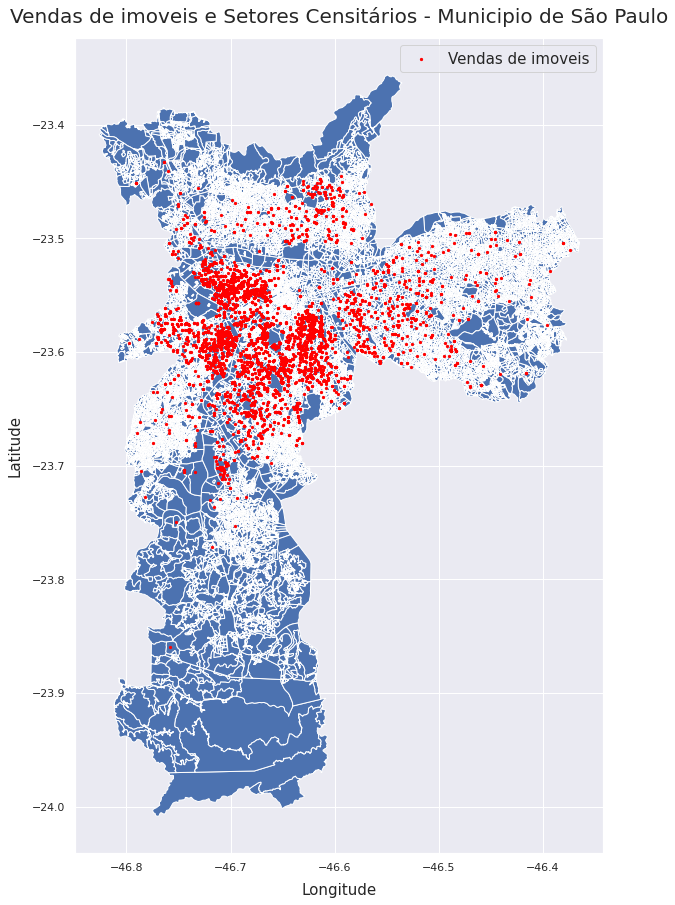

In [ ]:
# Mapa de setores censitarios e venda do municipio de Sao Paulo

# Gerando pontos de coordenadas das vendas
geometry = [Point(xy) for xy in zip(imoveis_geo_ibge["longitude"], imoveis_geo_ibge["latitude"])]
crs={'init':'epsg:4674'}  # Sistema de Referência de Coordenadas utilizada no ibge e setor censitario
geodata = gpd.GeoDataFrame(crs=crs, geometry=geometry)

# Gerando grafico
fig, ax = plt.subplots(figsize=(15,15))
set_cens_sp_gdf.plot(ax=ax)
geodata.plot(ax=ax, color='red', markersize=5);
ax.set_title('Vendas de imoveis e Setores Censitários - Municipio de São Paulo', fontsize=20, pad=15);
plt.legend(['Vendas de imoveis'], prop={'size': 15})
ax.set_ylabel('Latitude', fontsize=15, labelpad=10)
ax.set_xlabel('Longitude', fontsize=15, labelpad=10)

In [ ]:
imoveis_geo_ibge.select_dtypes(include=np.number).columns.tolist()

25

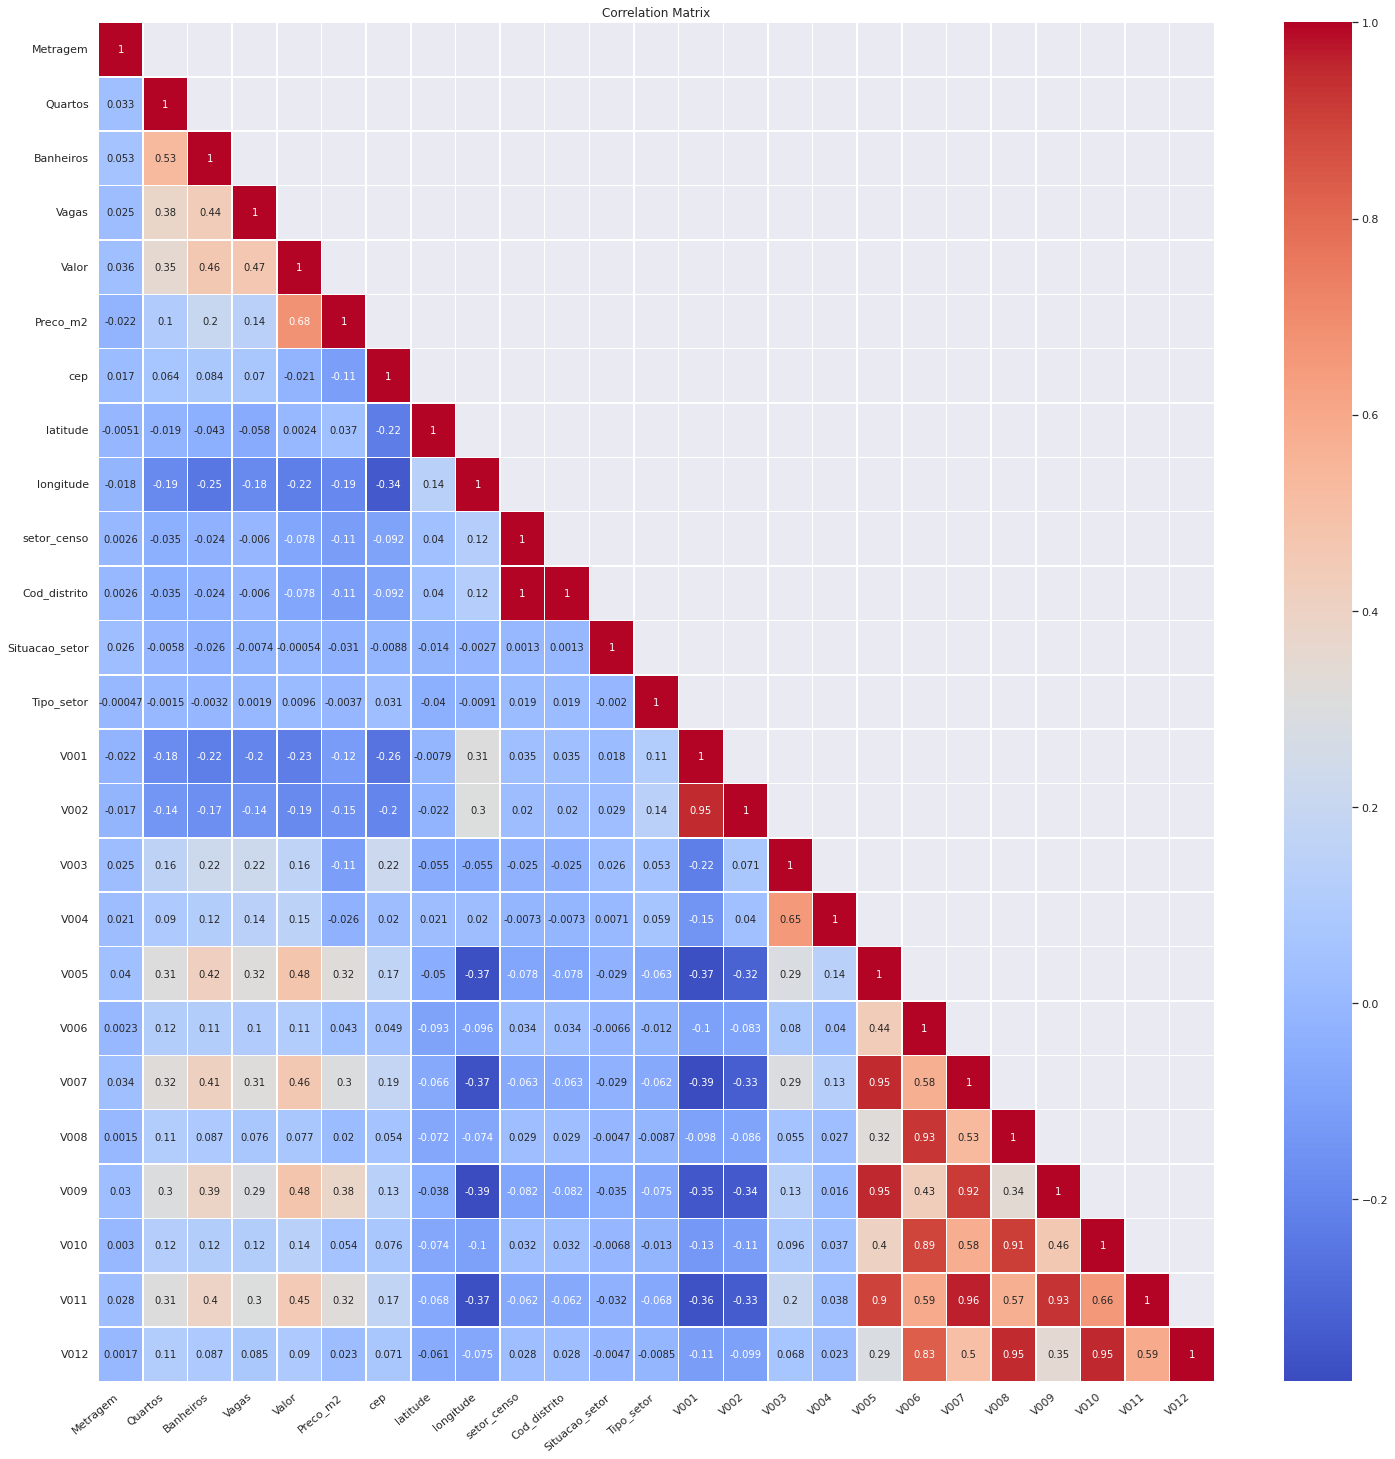

In [ ]:
#colunas = ['Metragem','Quartos','Banheiros','Vagas','Valor','Preco_m2','cep','latitude','longitude','V001','V002','V003','V004','V005','V006','V007','V008','V009','V010','V011','V012']
colunas = imoveis_geo_ibge.select_dtypes(include=np.number).columns.tolist()
corr_matrix(imoveis_geo_ibge[colunas])

### Tratando os outliers e comparando com os resultados.

In [ ]:
# Lendo dados de imoveis com dados do IBGE
path = "/content/drive/MyDrive/Imersão_de_dados_Alura_(2022)/Datasets gerados/imoveis_geo_ibge_4905.csv"
imoveis_drive = pd.read_csv(path)
imoveis_geo_ibge = imoveis_drive.drop(imoveis_drive.columns[[0]], axis=1)
display(imoveis_geo_ibge.head(), imoveis_geo_ibge.shape)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Preco_m2,rua_e_bairro,cep,latitude,longitude,Point,setor_censo,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7000.00,avenida itacira - planalto paulista,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00,355030877.00,SAÚDE,1.00,0.00,164.00,437.00,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,7459.68,rua aurelia perez alvarez - jardim dos estados,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00,355030871.00,SANTO AMARO,1.00,0.00,136.00,425.00,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,3040.00,rua alba valdez - jardim reimberg,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00,355030830.00,GRAJAÚ,1.00,0.00,142.00,493.00,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00,5400.00,rua tobias barreto - mooca,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00,355030808.00,BELÉM,1.00,0.00,156.00,468.00,3.00,1.99,2338.05,7826370.15,2447.89,7925839.76,1543.29,4646566.16,1909.04,5050712.69
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,1980000.00,4500.00,rua graham bell - santo amaro,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00,355030865.00,RAPOSO TAVARES,1.00,0.00,107.00,376.00,3.51,2.31,1026.36,272168.67,1143.96,167733.64,735.67,367088.08,1086.94,159622.46


(4905, 31)

In [ ]:
def detecta_outliers_1D(df, variavel, metodo):
    """
    Função detecta outliers unidimensionais de acordo com 3 métodos.
    !!! Necessita da instalação da biblioteca de scipy.stats para realizar metodo z-score !!!

    Criado a partir do codigo do artigo: 
    https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-1-4ece5098b755


    Parametros
    ----------
    dados: dataframe
        Tabela de dados.

    variavel: string
        Nome da coluna de tipo numerica da tabela.

    metodo: string
        Nome do metodo.


    Retorna
    -------
    outliers_prob, outliers_poss: listas
        Listas com outliers.
    OU
    outliers: lista
        Lista com outliers.


    Exemplos
    --------
    outliers_prob, outliers_poss = tratar_outliers_1D(df, 'variavel', 'tukey')
    outliers = tratar_outliers_1D(df, 'variavel', 'z-score')
    outliers = tratar_outliers_1D(df, 'variavel', 'mad')
    """


    from scipy import stats

    # -----------------------
    if (metodo == 'tukey'):

        # --- Tukey's method ---
        # Takes two parameters: dataframe & variable of interest as string
        q1 = df[variavel].quantile(0.25)
        q3 = df[variavel].quantile(0.75)
        iqr = q3 - q1
        inner_fence = 1.5 * iqr
        outer_fence = 3 * iqr
        
        # Inner fence lower and upper end
        inner_fence_le = q1 - inner_fence
        inner_fence_ue = q3 + inner_fence
        
        # Outer fence lower and upper end
        outer_fence_le = q1 - outer_fence
        outer_fence_ue = q3 + outer_fence
        
        # Probable outliers
        outliers_prob = []
        for index, x in enumerate(df[variavel]):
            if (x <= outer_fence_le) or (x >= outer_fence_ue):
                outliers_prob.append(index)

        # Possible outliers
        outliers_poss = []
        for index, x in enumerate(df[variavel]):
            if (x <= inner_fence_le) or (x >= inner_fence_ue):
                outliers_poss.append(index)

        print("Tukey's method")
        print(f"- Num. de Possiveis outliers: {len(outliers_poss)}")
        print(f"- Num. de Provaveis outliers: {len(outliers_prob)}\n")
        return outliers_prob, outliers_poss  


    # -----------------------
    if (metodo == 'z-score'):

        # --- Internally Studentized method (z-score) ---
        # Takes two parameters: dataframe & variable of interest as string
        z = np.abs(stats.zscore(df[variavel]))
        threshold = 3
        outliers = []
        for i, v in enumerate(z):
            if v > threshold:
                outliers.append(i)
            else:
                continue

        print(f"Internally studentized method (z-score)\n- Num. de Outliers: {len(outliers)}\n")
        return outliers
        

    # -----------------------
    if (metodo == 'mad'):

        # --- Median Absolute Deviation method (MAD) ---
        # Takes two parameters: dataframe & variable of interest as string
        med = np.median(df[variavel])
        mad = np.abs(stats.median_absolute_deviation(df[variavel]))
        threshold = 3
        outliers = []
        for i, v in enumerate(df[variavel]):
            t = (v - med) / mad
            if t > threshold:
                outliers.append(i)
            else:
                continue

        print(f"Median Absolute Deviation method (MAD)\n- Num. de Outliers: {len(outliers)}")
        return outliers
        

    # -----------------------
    else:  # Erro
        print('Erro: Metodo não definido.')
        print('Escolha entre os métodos:\n- tukey\n- z-score\n- mad')
        return

In [ ]:
def detecta_outliers_multi(df, variaveis, metodo):
    """
    Função detecta outliers multimensionais de acordo com 2 métodos.
    - Mahalanobis Distance
    - Minimum Covariance Determinant
    
    Criado a partir do codigo do artigo:
    https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-2-3a3319ec2c33


    Parametros
    ----------
    df: dataframe
        Tabela de dados.

    variaveis: lista
        Lista de strings, com nomes das colunas, de tipo numerica da tabela.

    metodo: string
        Nome do metodo.
    """

    from sklearn.covariance import MinCovDet
    from scipy.stats import chi2
    import scipy as sp
    
    # ------------------
    if (metodo == 'MD'):
        # --- Mahalonibis Distance ---
        # Mahalanobis Distance Method (MD)
        # OBS: It is a multivariate generalization of the internally studentized residuals (z-score)
        x_minus_mu = df[variaveis] - np.mean(df[variaveis])
        cov = np.cov(df[variaveis].values.T)                #Covariance
        inv_covmat = sp.linalg.inv(cov)                     #Inverse covariance
        left_term = np.dot(x_minus_mu, inv_covmat) 
        mahal = np.dot(left_term, x_minus_mu.T)
        md = np.sqrt(mahal.diagonal())
        
        # Outlier location in df index
        outliers = []
        # Significance level (e.g., 2.5%, 1%, 0.01%)
        sig_level = 0.001
        # Degrees of freedom = number of variables
        deg_free = df[variaveis].shape[1]
        # Cut-off point
        C = np.sqrt(chi2.ppf((1-sig_level), df=deg_free))
        # Flag ouliers
        for index, value in enumerate(md):
            if value > C:
                outliers.append(index)
            else:
                continue

        print(f"{deg_free}D Mahalanobis Distance Method (MD)\n- Num. de Outliers: {len(outliers)}\n")
        return outliers, md

    # -------------------
    if (metodo == 'MCD'):
        # --- Robust Mahalonibis Distance ---
        # The Minimum Covariance Determinant method (MCD)
        rng = np.random.RandomState(0)
        real_cov = np.cov(df[variaveis].values.T)
        X = rng.multivariate_normal(mean=np.mean(df[variaveis], axis=0), cov=real_cov, size=506)
        cov = MinCovDet(random_state=0).fit(X)
        mcd = cov.covariance_                   # robust covariance metric
        robust_mean = cov.location_             # robust mean
        inv_covmat = sp.linalg.inv(mcd)         # inverse covariance metric
        
        # Robust M-Distance
        x_minus_mu = df[variaveis] - robust_mean
        left_term = np.dot(x_minus_mu, inv_covmat)
        mahal = np.dot(left_term, x_minus_mu.T)
        md = np.sqrt(mahal.diagonal())
        
        # Outlier location in df index
        outliers = []
        # Significance level (e.g., 2.5%, 1%, 0.01%)
        sig_level = 0.001
        # Degrees of freedom = number of variables
        deg_free = df[variaveis].shape[1]
        # Cut-off point 
        C = np.sqrt(chi2.ppf((1-sig_level), df=deg_free))
        # Flag ouliers
        for index, value in enumerate(md):
            if value > C:
                outliers.append(index)
            else:
                continue

        print(f"{deg_free}D Minimum Covariance Determinant method (MCD)\n- Num. de Outliers: {len(outliers)}\n")
        return outliers, md


    # -----------   
    else:  # Erro
        print('Erro: Metodo não definido.')
        print('Escolha entre os métodos:\n- Mahalanobis Distance (MD)\n- Minimum Covariance Determinant (MCD)\n')
        return [], []

In [ ]:
def ver_outliers_multi(df, variaveis, outliers, md):
    # Visualization
    
    # You need deep copy otherwise cannot
    import copy
    import plotly.express as px

    # Copy a slice of a DataFrame
    df_copy = copy.deepcopy(df[variaveis])
    # Add column with md or robust md to copy of dataframe
    df_copy['md'] = md

    # --- Flag outliers ---
    flag = []
    for index in range(df_copy.shape[0]):
        if index in outliers:
            flag.append(1)
        else:
            flag.append(0)
    df_copy['flag'] = flag

    # --- Scatter plot ---
    #if (df_copy.shape[1] -2 == 2):  # 2D
    ax = sns.scatterplot(x=variaveis[0], y=variaveis[1], hue='flag', data=df_copy)
    #ax.set(xlim=(0,30000000),ylim=(0,5000))  # zoom para melhor vizualização
    plt.show()
    
    if (df_copy.shape[1] -2 == 3):  # 3D
        # https://plotly.com/python-api-reference/generated/plotly.express.scatter_3d
        fig = px.scatter_3d(df_copy, x=variaveis[0], y=variaveis[1], z=variaveis[2], color='flag')
        fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), title='3D plot')
        fig.show()

    return flag

In [ ]:
outliers_prob, outliers_poss = detecta_outliers_1D(imoveis_geo_ibge, 'Valor', 'tukey')
outliers_z = detecta_outliers_1D(imoveis_geo_ibge, 'Valor', 'z-score')
outliers_mad = detecta_outliers_1D(imoveis_geo_ibge, 'Valor', 'mad')

Tukey's method
- Num. de Possiveis outliers: 383
- Num. de Provaveis outliers: 166

Internally studentized method (z-score)
- Num. de Outliers: 122

Median Absolute Deviation method (MAD)
- Num. de Outliers: 467


In [ ]:
numeric_cols = imoveis_geo_ibge.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    print(f'--- {col} ---')
    outliers_prob, outliers_poss = detecta_outliers_1D(imoveis_geo_ibge, col, 'tukey')
    outliers_z = detecta_outliers_1D(imoveis_geo_ibge, col, 'z-score')
    outliers_mad = detecta_outliers_1D(imoveis_geo_ibge, col, 'mad')
    print('------------------------\n\n')

In [ ]:
colunas = ['Valor','Metragem','Banheiros','Vagas','Quartos']
#colunas = imoveis_geo_ibge.select_dtypes(include=np.number).columns.tolist()  # todas colunas numericas
outlier_MD, md_MD = detecta_outliers_multi(imoveis_geo_ibge, colunas, 'MD')

outlier_MCD, md_MCD = detecta_outliers_multi(imoveis_geo_ibge, colunas, 'MCD')

5D Mahalanobis Distance Method (MD)
- Num. de Outliers: 99

5D Minimum Covariance Determinant method (MCD)
- Num. de Outliers: 111



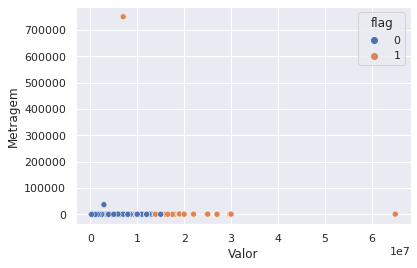

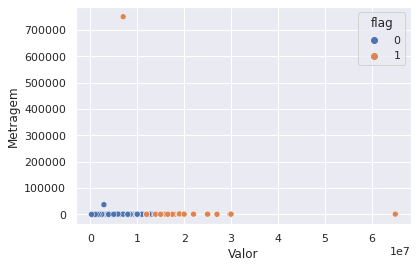

In [ ]:
flag_MD = ver_outliers_multi(imoveis_geo_ibge, colunas, outlier_MD, md_MD)
flag_MCD = ver_outliers_multi(imoveis_geo_ibge, colunas, outlier_MCD, md_MCD)

In [ ]:
imoveis_com_outliers = imoveis_geo_ibge.copy(deep=True)

In [ ]:
imoveis_sem_outliers = imoveis_com_outliers.drop(outlier_MCD, axis=0)
imoveis_sem_outliers.shape

(4794, 31)

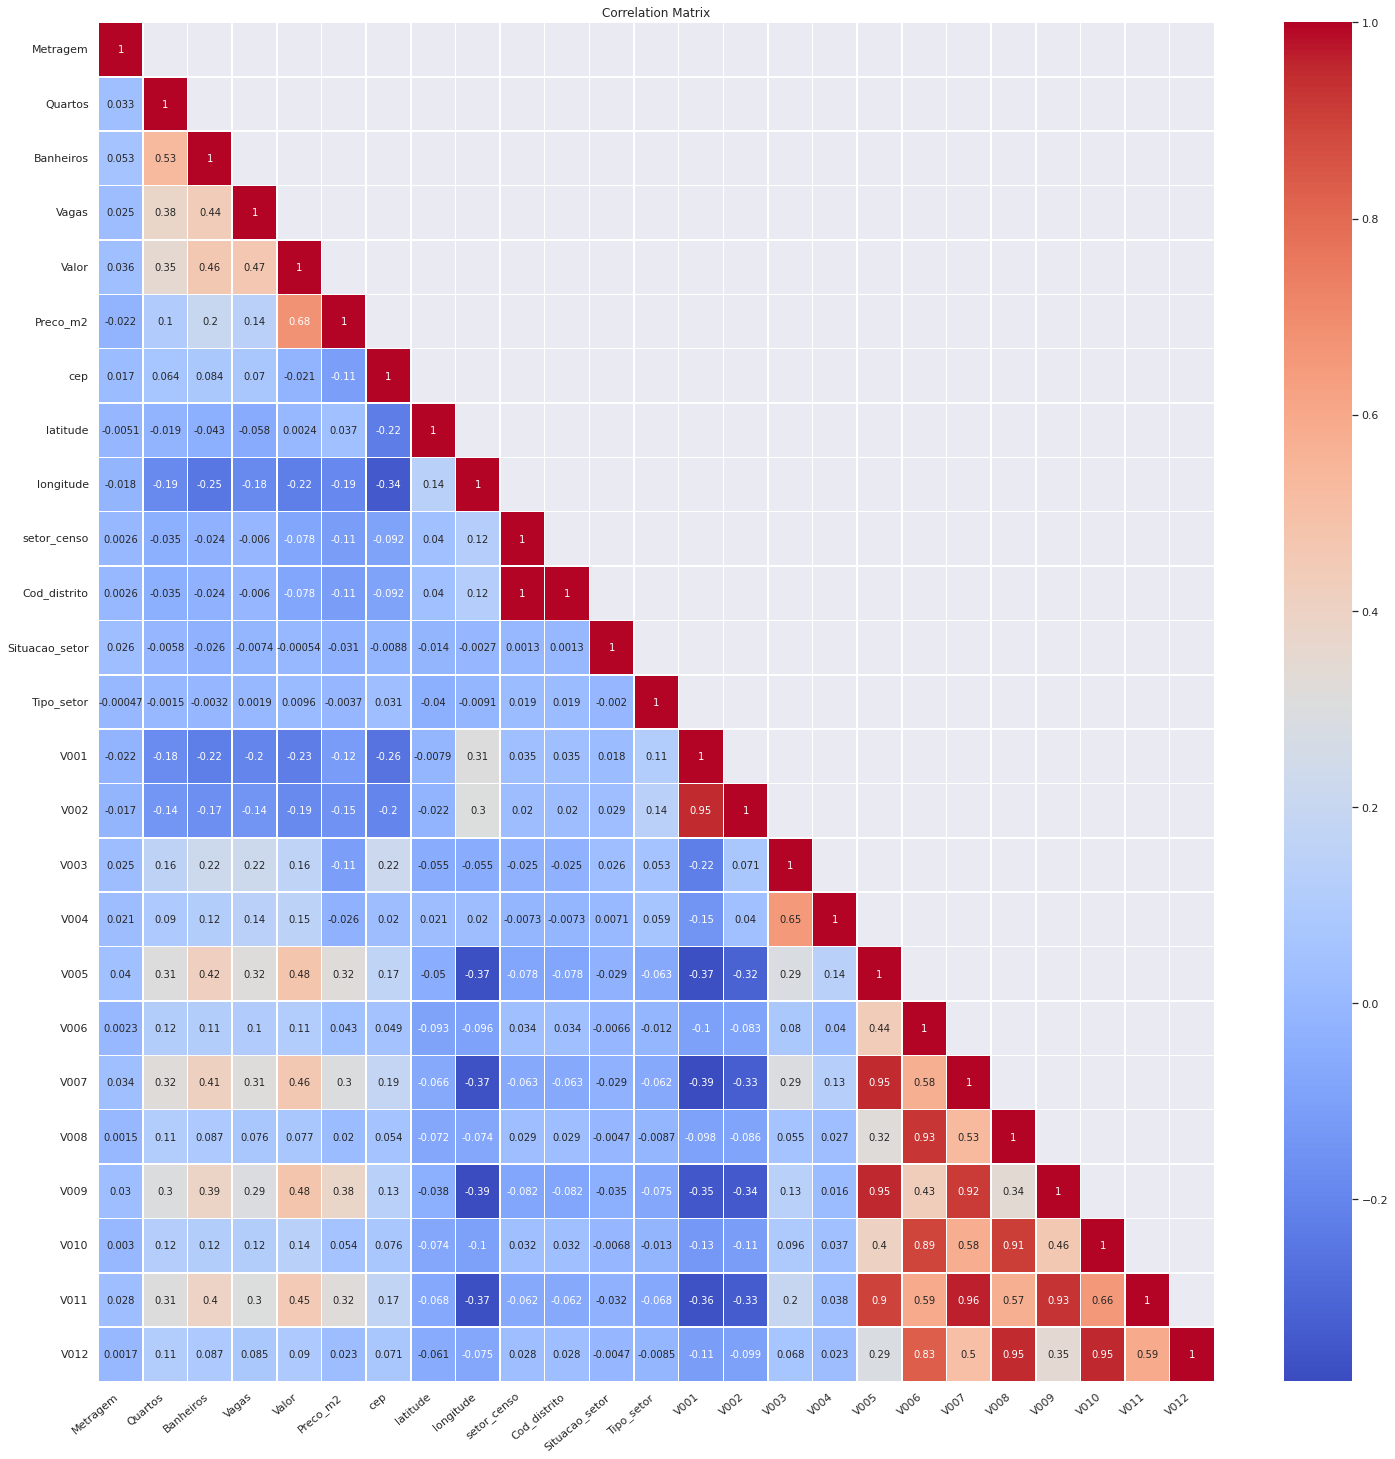

In [ ]:
corr_matrix(imoveis_com_outliers)

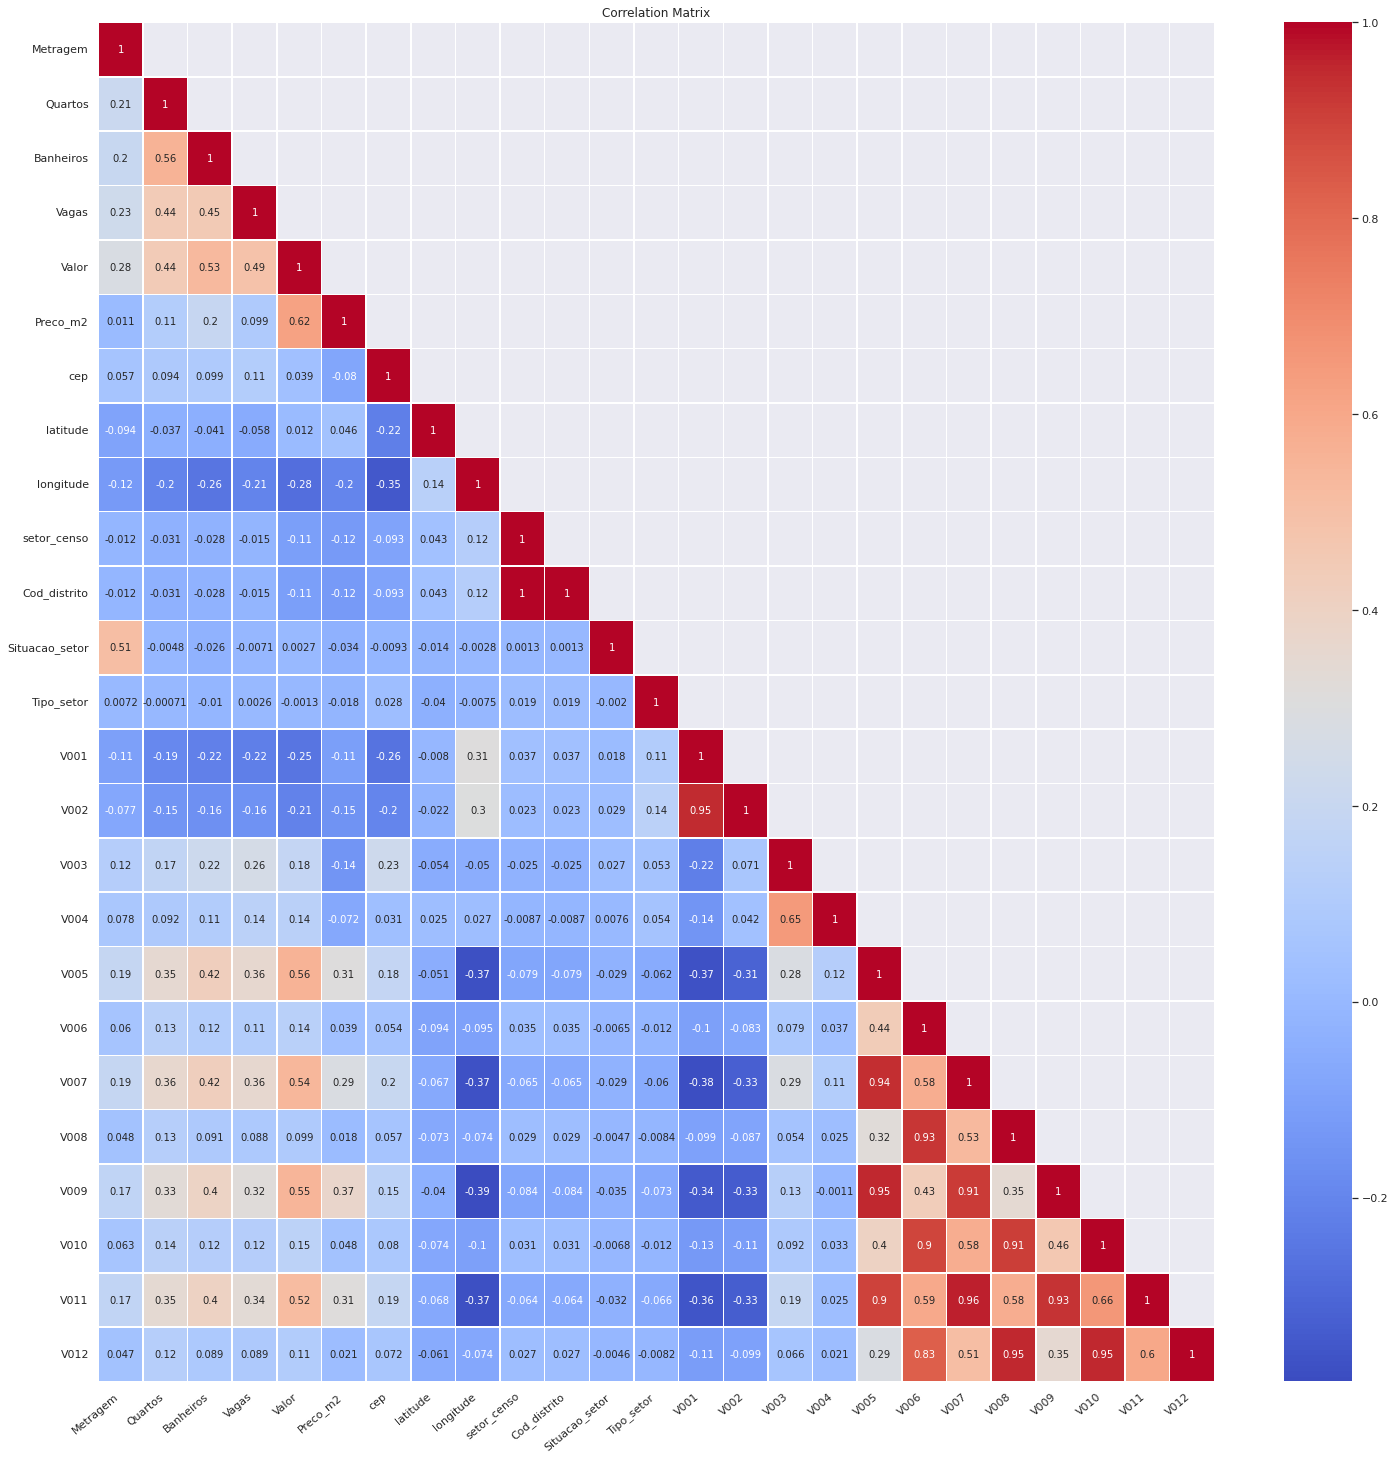

In [ ]:
corr_matrix(imoveis_sem_outliers)

In [ ]:
imoveis_com_outliers['Situacao_setor'].unique()

array([1., 8., 2., 4., 3.])

### Agrupando por mais de uma categoria e realizando as análises.

In [ ]:
agrupado_df = imoveis_geo_ibge.groupby(["setor_censo", "Bairro", 'V005']).mean()['Preco_m2'].sort_values(ascending=False)
agrupado_df = agrupado_df.reset_index()
agrupado_df.head(10)

,setor_censo,Bairro,V005,Preco_m2
0,355030883000203.00,Jardim Ampliação,8300.62,36000.00
1,355030862000167.00,Jardim Europa,6629.68,33150.18
2,355030879000003.00,Jardim América,1657.06,31523.81
3,355030845000025.00,Jardim América,13131.61,29859.72
4,355030877000218.00,Chácara Inglesa,3699.88,27500.00
5,355030854000011.00,Jardim Panorama,707.31,26666.67
6,355030862000110.00,Jardim Europa,21545.71,26267.43
7,355030883000061.00,Jardim Luzitânia,6874.86,23939.39
8,355030845000085.00,Pinheiros,5509.70,23937.50
9,355030832000032.00,Vila Nova Conceição,8748.23,21195.44


In [ ]:
agrupado_df = imoveis_geo_ibge.groupby(['Quartos','Banheiros']).mean()['Vagas'].sort_values(ascending=True)
agrupado_df = agrupado_df.reset_index()
agrupado_df.head(15)

,Quartos,Banheiros,Vagas
0,9,6,1.00
1,8,4,1.00
2,8,3,1.00
3,1,2,1.31
4,1,1,1.93
5,2,2,1.96
6,2,1,1.97
7,11,1,2.00
8,7,3,2.00
9,2,3,2.37


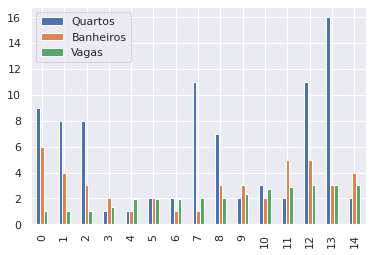

In [ ]:
agrupado_df.head(15).plot.bar()

## **Desafios Aula 4**

1 - Realizar uma análise dos dados do IBGE por mapa, analisando a distribuição de renda ([link](https://medium.com/creditas-tech/dados-georreferenciados-explora%C3%A7%C3%A3o-e-visualiza%C3%A7%C3%A3o-com-python-edd51e7c53da))

2 - Repassar a aula para entender melhor o que foi realizado

3 - Aprofundar a análise entre dados de vendas e renda.

4 - Realizar a análise exploratória e encontrar variáveis relevantes para solução do problema. 

### Análise dos dados do IBGE por mapa.


In [ ]:
#!pip3 install folium
import folium
#from folium import Choropleth, Marker
#from folium.plugins import MarkerCluster

In [ ]:
set_cens_gdf['NM_MUNICIP'].value_counts()

SÃO PAULO                18953
CAMPINAS                  1749
GUARULHOS                 1748
SÃO BERNARDO DO CAMPO     1222
SANTO ANDRÉ               1194
                         ...  
EMBAÚBA                      3
URU                          3
UNIÃO PAULISTA               3
TRABIJU                      3
FERNÃO                       3
Name: NM_MUNICIP, Length: 645, dtype: int64

In [ ]:
ibge_df['Nome_do_distrito'].value_counts().head().index.to_list()

['GRAJAÚ', 'CAPÃO REDONDO', 'JABAQUARA', 'JARDIM ÂNGELA', 'SAPOPEMBA']

In [ ]:
ibge_df.Cod_setor = ibge_df.Cod_setor.astype(str)
city = set_cens_sp_gdf.copy(deep=True)
city = city.merge(ibge_df, left_on='CD_GEOCODI', right_on='Cod_setor', how='left')

print(f'type: {type(city)}')
city

type: <class 'geopandas.geodataframe.GeoDataFrame'>


,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,109347.00,355030804000079,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42323,"POLYGON ((-46.51778 -23.57947, -46.51786 -23.5...",355030804000079,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030804.00,ARICANDUVA,35503080400.00,ARICANDUVA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,179.00,554.00,3.09,2.11,1335.48,3982486.43,1397.96,4082041.23,860.76,1933007.93,1241.68,2316552.19
1,109348.00,355030804000080,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42324,"POLYGON ((-46.51888 -23.57967, -46.51908 -23.5...",355030804000080,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030804.00,ARICANDUVA,35503080400.00,ARICANDUVA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,238.00,713.00,3.00,2.82,998.03,787438.49,1125.73,744229.10,708.58,626557.02,1047.18,571259.43
2,109349.00,355030804000081,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42325,"POLYGON ((-46.52015 -23.58105, -46.52026 -23.5...",355030804000081,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030804.00,ARICANDUVA,35503080400.00,ARICANDUVA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,203.00,685.00,3.37,2.78,1057.50,1098171.92,1270.25,1048565.77,697.24,735503.32,1082.56,724807.31
3,109350.00,355030804000082,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42326,"POLYGON ((-46.52140 -23.57992, -46.52144 -23.5...",355030804000082,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030804.00,ARICANDUVA,35503080400.00,ARICANDUVA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,279.00,902.00,3.23,2.25,1296.16,28854714.26,1586.09,34875611.24,777.64,10751997.93,1304.12,17358390.21
4,109351.00,355030804000083,URBANO,35503080400,None,355030804,ARICANDUVA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42327,"POLYGON ((-46.52371 -23.58185, -46.52384 -23.5...",355030804000083,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030804.00,ARICANDUVA,35503080400.00,ARICANDUVA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,186.00,602.00,3.24,2.57,893.58,717708.36,1051.93,678067.75,592.82,474377.58,919.90,435113.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18948,127887.00,355030896000243,URBANO,35503089600,None,355030896,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62381,"POLYGON ((-46.38853 -23.54385, -46.38852 -23.5...",355030896000243,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030896.00,LAJEADO,35503089600.00,LAJEADO,3550308000.00,SÃO PAULO (todos os setores),1.00,1.00,96.00,336.00,3.50,2.61,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08
18949,127888.00,355030896000244,URBANO,35503089600,None,355030896,LAJEADO,3550308,SÃ

In [ ]:
top5_dist = ibge_df['Nome_do_distrito'].value_counts().head(25).index.to_list()
city = city[city['Nome_do_distrito'].isin(top5_dist)]
#imoveis_df[imoveis_df['Bairro'].isin([bairro])]
display(top5_dist,city)

['GRAJAÚ',
 'CAPÃO REDONDO',
 'JABAQUARA',
 'JARDIM ÂNGELA',
 'SAPOPEMBA',
 'JARDIM SÃO LUÍS',
 'CIDADE ADEMAR',
 'BRASILÂNDIA',
 'ITAIM PAULISTA',
 'SACOMÃ',
 'CIDADE TIRADENTES',
 'CAMPO LIMPO',
 'TREMEMBÉ',
 'ITAQUERA',
 'PARELHEIROS',
 'RIO PEQUENO',
 'VILA SÔNIA',
 'PEDREIRA',
 'PIRITUBA',
 'CIDADE DUTRA',
 'JARAGUÁ',
 'LAJEADO',
 'VILA MARIANA',
 'VILA JACUÍ',
 'FREGUESIA DO Ó',
 'SÃO MATEUS',
 'SAÚDE',
 'VILA MEDEIROS',
 'JARDIM HELENA',
 'VILA ANDRADE']

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry,Cod_setor,Cod_Grandes Regiões,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,Nome_da_RM,Cod_municipio,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Cod_subdistrito,Nome_do_subdistrito,Cod_bairro,Nome_do_bairro,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
15,109951.00,355030811000042,URBANO,35503081100,None,355030811,BRASILÂNDIA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42338,"POLYGON ((-46.68700 -23.47131, -46.68648 -23.4...",355030811000042,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030811.00,BRASILÂNDIA,35503081100.00,BRASILÂNDIA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,196.00,549.00,2.80,1.19,2199.93,2652270.53,2343.40,2488136.31,1564.33,2420413.72,1999.59,2222988.39
16,109952.00,355030811000043,URBANO,35503081100,None,355030811,BRASILÂNDIA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42339,"POLYGON ((-46.68594 -23.47147, -46.68535 -23.4...",355030811000043,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030811.00,BRASILÂNDIA,35503081100.00,BRASILÂNDIA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,245.00,709.00,2.89,1.19,2479.02,3983238.38,2584.51,3879656.49,1574.26,3042498.64,2165.50,2904512.02
17,109953.00,355030811000044,URBANO,35503081100,None,355030811,BRASILÂNDIA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42340,"POLYGON ((-46.68682 -23.46818, -46.68676 -23.4...",355030811000044,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030811.00,BRASILÂNDIA,35503081100.00,BRASILÂNDIA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,199.00,660.00,3.32,2.60,927.77,1567309.54,1239.10,1708427.97,718.85,1112097.87,1140.79,1283976.99
18,109954.00,355030811000045,URBANO,35503081100,None,355030811,BRASILÂNDIA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42341,"POLYGON ((-46.69145 -23.46874, -46.69146 -23.4...",355030811000045,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030811.00,BRASILÂNDIA,35503081100.00,BRASILÂNDIA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,214.00,712.00,3.33,2.82,1158.74,1682312.76,1408.93,1693111.15,795.05,1292059.30,1278.28,1460099.41
19,109955.00,355030811000046,URBANO,35503081100,None,355030811,BRASILÂNDIA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,42342,"POLYGON ((-46.69403 -23.46459, -46.69333 -23.4...",355030811000046,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030811.00,BRASILÂNDIA,35503081100.00,BRASILÂNDIA,3550308000.00,SÃO PAULO (todos os setores),1.00,0.00,250.00,828.00,3.31,3.34,1120.39,2512110.04,1191.91,2587540.02,701.90,1573672.54,1055.09,1993767.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18948,127887.00,355030896000243,URBANO,35503089600,None,355030896,LAJEADO,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,62381,"POLYGON ((-46.38853 -23.54385, -46.38852 -23.5...",355030896000243,3.00,Região Sudeste,35.00,São Paulo,3515.00,Metropolitana de São Paulo,35061.00,São Paulo,20.00,RM São Paulo,3550308.00,SÃO PAULO,355030896.00,LAJEADO,35503089600.00,LAJEADO,3550308000.00,SÃO PAULO (todos os setores),1.00,1.00,96.00,336.00,3.50,2.61,772.09,168751.10,814.52,143188.21,467.46,191332.48,699.95,123399.08
18949,127888.00,355030896000244,URBANO,35503089600,Non

In [ ]:
# Create the map
center = [-23.550, -46.634]
m_stamen_2 = folium.Map(location=center, tiles='Stamen Toner', zoom_start=12)
# Add a choropleth map to the base map
Choropleth(geo_data=city.__geo_interface__,
           data=city, 
           columns=['CD_GEOCODI', 'V005'],
           key_on="feature.properties.CD_GEOCODI", 
           fill_color='PuRd', 
           fill_opacity=0.7,
           legend_name='Renda Média').add_to(m_stamen_2)

# Display the map
#m_stamen_2

### Análise entre dados de vendas e renda.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


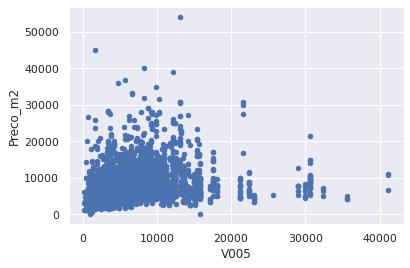

In [ ]:
imoveis_geo_ibge[['Preco_m2','V005']].plot(x='V005',y='Preco_m2',kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


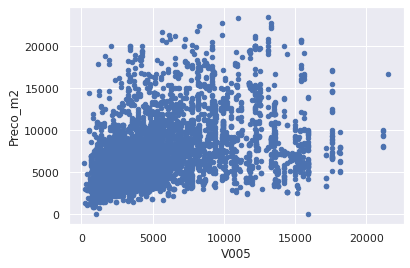

In [ ]:
imoveis_sem_outliers[['Preco_m2','V005']].plot(x='V005',y='Preco_m2',kind='scatter')

### Análise exploratória de variáveis relevantes para solução do problema. 

In [ ]:
# Salvando dados de Imoveis tratados para criacao de um modelo preditivo
from google.colab import files, drive
path = "/content/drive/MyDrive/Imersão_de_dados_Alura_(2022)/Datasets gerados/imoveis_tratados.csv"

with open(path, 'w', encoding = 'utf-8-sig') as f:
    imoveis_sem_outliers.to_csv(f)